### Problem 1: Generating Some Data As A Toy Example



Generate three clusters of data as A, B, and C. 

* A = 10 (x,y) samples from the gaussian distribution, with mean=(0,0), cov=I, i.
e., N(mean,std)

* B = 10 (x,y) samples from the gaussian distribution, with mean=(4,4), cov=I, i.e., N(mean,std)

* C = 10 (x,y) samples from the gaussian distribution, with mean=(-4,4), cov=I, i.e., N(mean,std)

*Hint: use the multivariate_normal function, and set the mean, covariance, and size for each cluster.*

In [ ]:
import numpy as np
# Add code here to generate the three clusters
A = np.random.multivariate_normal(mean=[0,0],cov=np.eye(2),size=10)
B = np.random.multivariate_normal(mean=[4,4],cov=np.eye(2),size=10)
C = np.random.multivariate_normal(mean=[-4,4],cov=np.eye(2),size=10)

In [ ]:
A, A.shape

(array([[ 0.4542712 ,  0.8164693 ],
        [ 1.01003777, -0.43922498],
        [-0.45757273,  0.37217153],
        [ 0.99591456,  1.55040653],
        [-0.31486885, -2.42496089],
        [-0.92450504, -1.04012058],
        [ 1.40484836,  0.83636291],
        [-0.01831467, -1.30559553],
        [ 0.44910736, -0.32347643],
        [ 0.24141477, -0.20617815]]), (10, 2))

Visualize the true distribution of the samples by plotting them in a scatter plot. Plot the x and y coordinates for each sample in A, B, and C. Try to use a for loop to do this. 

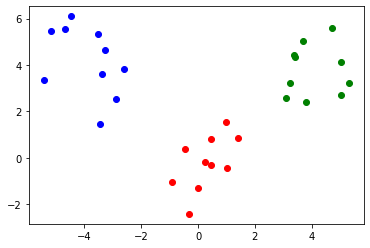

In [ ]:
import matplotlib.pyplot as plt
color_list = ['r','g','b']
sample_lists = [A,B,C]
# Add your code here
for index, datas in enumerate(sample_lists):
  plt.scatter(datas[:,0],datas[:,1],c=color_list[index])

### Problem 2: How can we cluster these points if we do not know the labels?

First, mix and shuffle the data, which includes A, B, and C. There's a function in the numpy library that will do this. 

Then, visualize the data through a scatter plot. 

(30, 2)


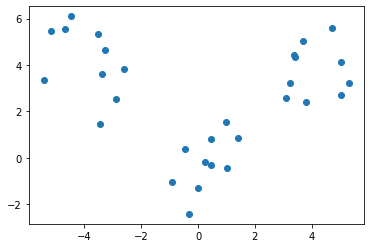

In [ ]:
# Add your code here to mix and shuffle the data. Make sure data contains A, B, and C.
data = np.concatenate([A,B,C])
print(data.shape)
# Add your code to visualize the samples through a scatter plot
plt.scatter(data[:,0],data[:,1])

Now, implement the K-Means algorithm yourself. 


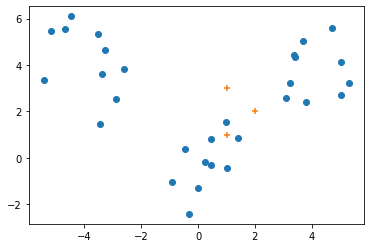

In [ ]:
# How many clusters should you have? Set the value of K based on the number of clusters you created in Problem 1.
K = 3
# Select three random points as initial centers (pick any three coordinates)
c1 = np.array([1,1]) 
c2 = np.array([2,2]) 
c3 = np.array([1,3]) 
centers = np.vstack([c1,c2,c3])

# Now visualize the center and the samples. You can add a 'marker' parameter in the numpy scatterplot function to visualize where the center is. 
plt.scatter(data[:,0],data[:,1])
plt.scatter(centers[:,0],centers[:,1],marker = '+')

# print(data,centers)

In [ ]:
# Create a new empty array of zeros to store the distances in 
dist = np.zeros([len(data),len(centers)])
print(dist.shape)

(30, 3)


In [ ]:
# Iterate through the clusters and fill the distance array 
# Calculate the distance between the sample to each class center. You can do this using the norm function.
for d_id,d in enumerate(data):
  for c_id, c in enumerate(centers):
    dist[d_id,c_id] = np.sum((d - c)**2)
dist

array([[ 0.33150344,  3.79002243,  5.06562623],
       [ 2.0714693 ,  6.92984371, 11.82836921],
       [ 2.51868687,  8.68948928,  9.03000076],
       [ 0.30296404,  1.21032186,  2.10133792],
       [13.45923723, 24.93889672, 31.1590808 ],
       [ 7.86581161, 17.79506284, 20.02629393],
       [ 0.19067929,  1.70825674,  4.84522763],
       [ 6.35273551, 15.00055591, 19.57511763],
       [ 2.05507256,  7.8038107 , 11.34897827],
       [ 2.03031728,  7.95984403, 10.85502987],
       [23.44212654, 12.37814113, 18.48536618],
       [23.68446022, 12.18341838, 11.50059317],
       [17.01659482,  7.49374782,  7.66160274],
       [17.43077744,  7.8165197 ,  7.68221966],
       [ 6.83436272,  1.50643725,  4.49457186],
       [ 9.79548466,  3.39209274,  8.17541475],
       [34.85895996, 20.24992103, 20.5145521 ],
       [19.21180817,  9.73145258, 16.4107582 ],
       [ 9.86413193,  2.98083367,  4.97261681],
       [26.0846134 , 13.74454662, 17.48793186],
       [46.67294095, 56.79890017, 41.267

In [ ]:
# Assign the class of each sample to the closest center. You can use the numpy function argmin, 
# which returns the indices of the minimum values along an axis.
labels = np.argmin(dist,axis=1)
print(labels)

[0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0]


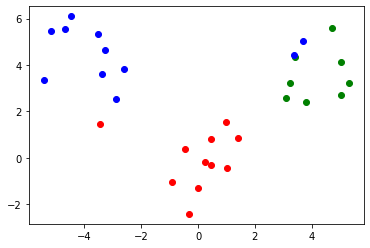

In [ ]:
# color_list = ['r','g','b']
# sample_lists = [A,B,C]
# Visualize the initial cluster results for the three clusters: 
plt.figure()
for i in range(K):
  plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c= color_list[i])

In [ ]:
# Find new centers and assign new labels to the samples, then visualize again
# create an empty array with 2 columns
centers = np.empty((0,2))
for i in range(K):
  c = np.mean(data[labels==i], axis=0)
  centers = np.vstack((centers,c))
centers

array([[-0.0542865 , -0.06592287],
       [ 4.19864222,  3.52828962],
       [-2.57682515,  4.53369501]])

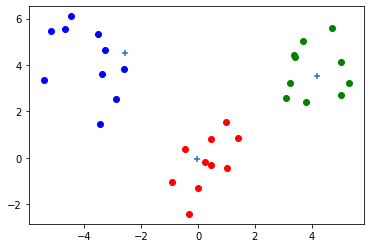

In [ ]:
# Calculate the new distance the way you did before
dist = np.zeros([len(data),len(centers)])
for d_id,d in enumerate(data):
  for c_id, c in enumerate(centers):
    dist[d_id,c_id] = np.sum((d - c)**2)

# Assign new labels like you did before using argmin
labels = np.argmin(dist,axis=1)

# Visualize the data again 
for i in range(K):
    plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c= color_list[i])

# Plot the centers as a scatter plot
plt.scatter(centers[:,0],centers[:,1],marker = '+')

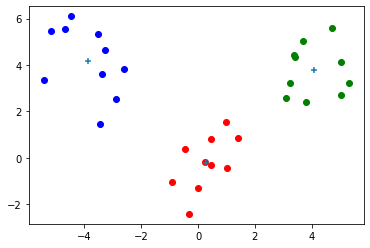

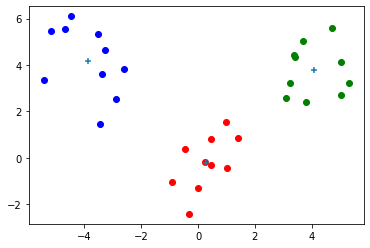

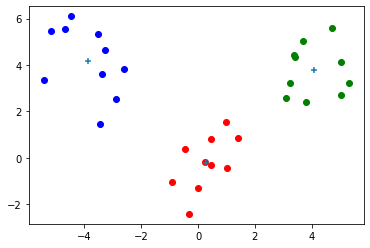

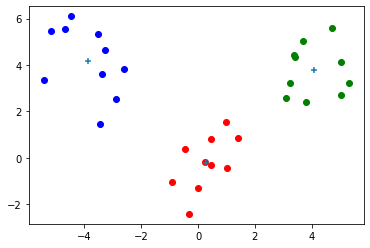

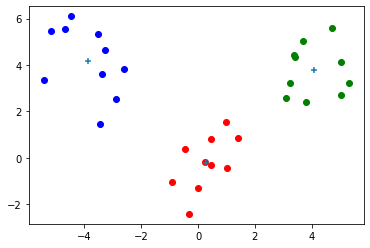

In [ ]:
# Iterate finding new centers and assigning new labels 5 times. Hint: you have all the code for one time above. 
for iter in range(5):
  # Find new centers
  centers = np.empty((0,2))
  for i in range(K):
    c = np.mean(data[labels==i], axis=0)
    centers = np.vstack((centers,c))

  # Calculate the new distance
  dist = np.zeros([len(data),len(centers)])
  for d_id,d in enumerate(data):
    for c_id, c in enumerate(centers):
      dist[d_id,c_id] = np.sum((d - c)**2)

  # Assign new labels
  labels = np.argmin(dist,axis=1)

  # Visualize in 5 figures respectively to see the convergence
  plt.figure()
  for i in range(K):
    plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c= color_list[i])

  # Plot the centers as a scatter plot
  plt.scatter(centers[:,0],centers[:,1],marker = '+')